In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Question 1 part a 5 states 

In [2]:
lamda = 0.9 #discount rate
r_5state = np.array(([0,0.2],[0,0],[0,0],[0,0],[1,0]))
r_10state = np.array(([0,0.2],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[1,0]))




In [3]:
def update_q_value(org_q,row=5):
    # for state 5 , we can go to state 1 or 5
    # for others state  we can go to state 1 or the next state
    org_qcopy = org_q.copy()
    ans = np.zeros((row,2))
    for i in range(row-1):
        ans[i][0]=max(org_qcopy[i+1])
        ans[i][1]=max(org_qcopy[0])
    ans[row-1][0]=max(org_qcopy[row-1])
    ans[row-1][1]=max(org_qcopy[0])
    return ans
    
    

In [4]:
def update_q_value_random(org_q,row=5):
    org_qcopy = org_q.copy()
    ans = np.zeros((row,2))
    rand_arr=np.random.randint(0,2,row)#randomly generates 0 or 1
    for i in range(row-1):
        ans[i][0]=org_qcopy[i+1][rand_arr[i]]
        ans[i][1]=org_qcopy[0][rand_arr[i]]
    ans[row-1][0]=org_qcopy[row-1][rand_arr[row-1]]
    ans[row-1][1]=org_qcopy[0][rand_arr[row-1]]
    return ans


In [5]:
def qlearning_greed(alpha=0.9,epsl=0.1,row=5,r=r_5state,lmd=lamda):
    
    gap= 1000
    q_value = np.zeros((row,2)) #initial value of q_value
    iter_times =0
    e =1e-5
    while gap>e :
        rd_float = np.random.rand()
        if rd_float<epsl: # randomly choose a action between two
            q_value_new = q_value + alpha*(r + lmd*update_q_value_random(q_value,row) - q_value)
        else:
            q_value_new = q_value + alpha*(r + lmd*update_q_value(q_value,row) - q_value)
        gap = ((q_value-q_value_new)**2).sum(axis=(0,1))
        q_value=q_value_new
        iter_times+=1
    return iter_times,q_value
        
            
            
    

In [6]:
np.mean([qlearning_greed(alpha=1,epsl=0.18)[0] for i in range(10)]) # simulate for 10 times and get the average value

5846.4

In [7]:
def simulate(row=5,lamda=0.9,r=r_5state):
    alphas=np.arange(1,0.75,-0.05) # learning rate
    epsls = np.arange(0,0.2,0.01) # e greedy
    ## collect result
    result_a = {}
    for alpha in alphas:
        result_e = {}
        for epsilon in epsls:
            result_e[epsilon]= np.mean([qlearning_greed(alpha=alpha,epsl=epsilon,row=row,r=r,lmd=lamda)[0] for i in range(10)])
            #print('alpha '+ str(alpha)+' epsilon '+str(epsilon)+' result '+str(result_e[epsilon]))
        result_a[alpha] = result_e

    ### collect result of iteration times
    results = []
    for i in result_a:
        results.append(list(result_a[i].values()))
    return results

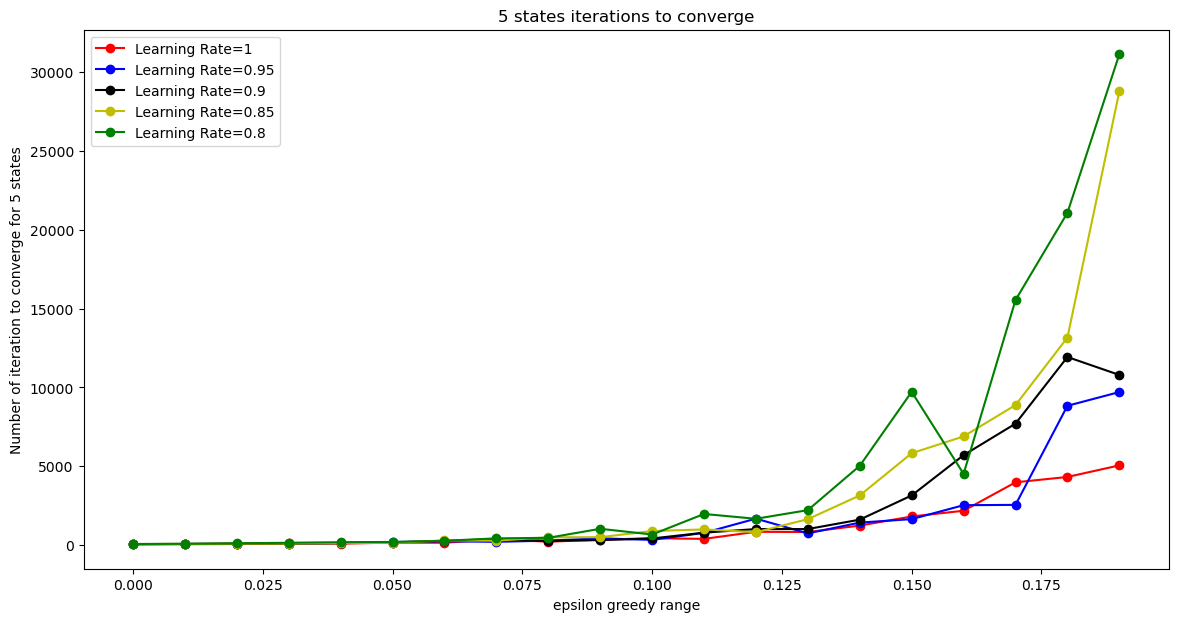

In [9]:
## plot the result
results=simulate()
epsls = np.arange(0,0.2,0.01)
plt.figure(1,figsize=(14,7))
plt.plot(epsls, results[0], marker='o', color='r', label='Learning Rate=1')
plt.plot(epsls, results[1], marker='o', color='b', label='Learning Rate=0.95')
plt.plot(epsls, results[2], marker='o', color='black', label='Learning Rate=0.9')
plt.plot(epsls, results[3], marker='o', color='y', label='Learning Rate=0.85')
plt.plot(epsls, results[4], marker='o', color='g', label='Learning Rate=0.8')
plt.legend()
plt.xlabel('epsilon greedy range')
plt.ylabel('Number of iteration to converge for 5 states')

plt.savefig('5 states iterations to converge.png')
plt.title('5 states iterations to converge')
plt.show()

In [31]:
results=simulate(row=10,lamda=0.9,r=r_10state)
epsls = np.arange(0,0.2,0.01)
plt.figure(1,figsize=(14,7))
plt.plot(epsls, results[0], marker='o', color='r', label='Learning Rate=1')
plt.plot(epsls, results[1], marker='o', color='b', label='Learning Rate=0.95')
plt.plot(epsls, results[2], marker='o', color='black', label=':Learning Rate=0.9')
plt.plot(epsls, results[3], marker='o', color='y', label=':Learning Rate=0.85')
plt.plot(epsls, results[4], marker='o', color='g', label=':Learning Rate=0.8')
plt.legend()
plt.xlabel('epsilon range')
plt.ylabel('Number of iteration to converge for 5 states')

plt.savefig('10 states iterations to converge.png')
plt.title('10 states iterations to converge')
plt.show()

alpha 1.0 epsilon 0.0 result 70.0
alpha 1.0 epsilon 0.01 result 77.8
alpha 1.0 epsilon 0.02 result 96.1
alpha 1.0 epsilon 0.03 result 146.8
alpha 1.0 epsilon 0.04 result 121.3
alpha 1.0 epsilon 0.05 result 210.4
alpha 1.0 epsilon 0.06 result 251.2
alpha 1.0 epsilon 0.07 result 309.2
alpha 1.0 epsilon 0.08 result 286.3
alpha 1.0 epsilon 0.09 result 379.5
alpha 1.0 epsilon 0.1 result 667.7
alpha 1.0 epsilon 0.11 result 1436.8
alpha 1.0 epsilon 0.12 result 1136.7
alpha 1.0 epsilon 0.13 result 1464.0
alpha 1.0 epsilon 0.14 result 1759.0
alpha 1.0 epsilon 0.15 result 2826.0
alpha 1.0 epsilon 0.16 result 5843.1
alpha 1.0 epsilon 0.17 result 6326.0
alpha 1.0 epsilon 0.18 result 10841.8
alpha 1.0 epsilon 0.19 result 13119.1
alpha 0.95 epsilon 0.0 result 74.0
alpha 0.95 epsilon 0.01 result 112.9
alpha 0.95 epsilon 0.02 result 101.0
alpha 0.95 epsilon 0.03 result 102.5
alpha 0.95 epsilon 0.04 result 151.3
alpha 0.95 epsilon 0.05 result 249.7
alpha 0.95 epsilon 0.06 result 202.1
alpha 0.95 epsilo

KeyboardInterrupt: 

In [40]:
qlearning_greed()

(48086, array([[6.56096838, 6.10486838],
        [7.28996839, 5.90486838],
        [8.09996839, 5.90486838],
        [8.99996839, 5.90486838],
        [9.99996839, 5.90486838]]))

In [ ]:
# Question 1 part b 10 states 

In [39]:
qlearning_greed(row=10,r=r_10state)

(15804, array([[3.87419412, 3.68677338],
        [4.30466135, 3.48677338],
        [4.78295826, 3.48677338],
        [5.31439926, 3.48677338],
        [5.90488926, 3.48677338],
        [6.56098926, 3.48677338],
        [7.28998926, 3.48677338],
        [8.09998926, 3.48677338],
        [8.99998926, 3.48677338],
        [9.99998926, 3.48677338]]))

In [ ]:
#Question 2

In [51]:
qlearning_greed(lmd=0.1)

(9, array([[0.00222215, 0.22222215],
        [0.00222215, 0.02222215],
        [0.01111076, 0.02222215],
        [0.11111075, 0.02222215],
        [1.11111075, 0.02222215]]))

In [32]:
q2_5r_lowlmd=simulate(row=5,lamda=0.1,r=r_5state)

alpha 1.0 epsilon 0.0 result 4.0
alpha 1.0 epsilon 0.01 result 4.3
alpha 1.0 epsilon 0.02 result 4.0
alpha 1.0 epsilon 0.03 result 4.0
alpha 1.0 epsilon 0.04 result 4.4
alpha 1.0 epsilon 0.05 result 4.7
alpha 1.0 epsilon 0.06 result 4.8
alpha 1.0 epsilon 0.07 result 4.7
alpha 1.0 epsilon 0.08 result 4.2
alpha 1.0 epsilon 0.09 result 4.4
alpha 1.0 epsilon 0.1 result 4.9
alpha 1.0 epsilon 0.11 result 4.9
alpha 1.0 epsilon 0.12 result 4.8
alpha 1.0 epsilon 0.13 result 4.2
alpha 1.0 epsilon 0.14 result 4.2
alpha 1.0 epsilon 0.15 result 5.0
alpha 1.0 epsilon 0.16 result 4.6
alpha 1.0 epsilon 0.17 result 5.7
alpha 1.0 epsilon 0.18 result 4.3
alpha 1.0 epsilon 0.19 result 5.8
alpha 0.95 epsilon 0.0 result 5.0
alpha 0.95 epsilon 0.01 result 5.0
alpha 0.95 epsilon 0.02 result 5.3
alpha 0.95 epsilon 0.03 result 5.4
alpha 0.95 epsilon 0.04 result 5.0
alpha 0.95 epsilon 0.05 result 5.0
alpha 0.95 epsilon 0.06 result 5.1
alpha 0.95 epsilon 0.07 result 5.2
alpha 0.95 epsilon 0.08 result 6.5
alpha 0.

In [33]:
q2_10r_lowlmd=simulate(row=10,lamda=0.1,r=r_10state)

alpha 1.0 epsilon 0.0 result 4.0
alpha 1.0 epsilon 0.01 result 4.0
alpha 1.0 epsilon 0.02 result 4.4
alpha 1.0 epsilon 0.03 result 4.0
alpha 1.0 epsilon 0.04 result 4.4
alpha 1.0 epsilon 0.05 result 4.5
alpha 1.0 epsilon 0.06 result 4.4
alpha 1.0 epsilon 0.07 result 4.4
alpha 1.0 epsilon 0.08 result 4.9
alpha 1.0 epsilon 0.09 result 5.3
alpha 1.0 epsilon 0.1 result 4.4
alpha 1.0 epsilon 0.11 result 4.7
alpha 1.0 epsilon 0.12 result 5.8
alpha 1.0 epsilon 0.13 result 4.3
alpha 1.0 epsilon 0.14 result 4.5
alpha 1.0 epsilon 0.15 result 5.4
alpha 1.0 epsilon 0.16 result 5.5
alpha 1.0 epsilon 0.17 result 5.4
alpha 1.0 epsilon 0.18 result 5.7
alpha 1.0 epsilon 0.19 result 4.9
alpha 0.95 epsilon 0.0 result 5.0
alpha 0.95 epsilon 0.01 result 5.0
alpha 0.95 epsilon 0.02 result 5.0
alpha 0.95 epsilon 0.03 result 5.1
alpha 0.95 epsilon 0.04 result 5.0
alpha 0.95 epsilon 0.05 result 5.0
alpha 0.95 epsilon 0.06 result 5.3
alpha 0.95 epsilon 0.07 result 5.4
alpha 0.95 epsilon 0.08 result 5.6
alpha 0.

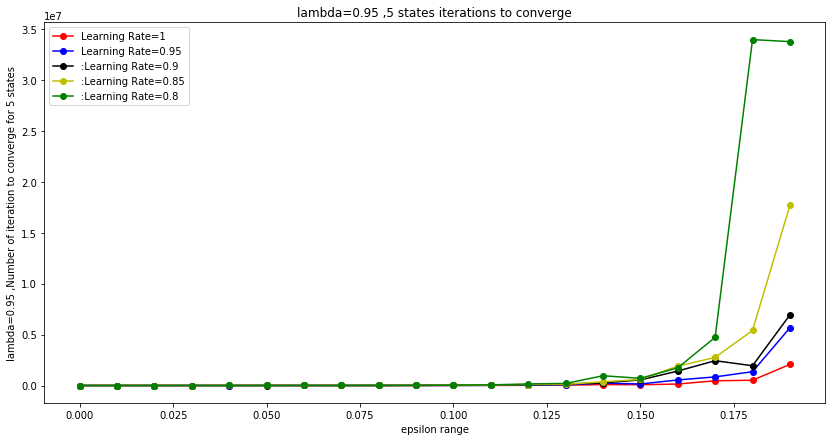

In [37]:
epsls = np.arange(0,0.2,0.01)
results=q2_5r_highlmd
plt.figure(1,figsize=(14,7))
plt.plot(epsls, results[0], marker='o', color='r', label='Learning Rate=1')
plt.plot(epsls, results[1], marker='o', color='b', label='Learning Rate=0.95')
plt.plot(epsls, results[2], marker='o', color='black', label=':Learning Rate=0.9')
plt.plot(epsls, results[3], marker='o', color='y', label=':Learning Rate=0.85')
plt.plot(epsls, results[4], marker='o', color='g', label=':Learning Rate=0.8')
plt.legend()
plt.xlabel('epsilon range')
plt.ylabel('lambda=0.95 ,Number of iteration to converge for 5 states')

#plt.savefig('5 states iterations to converge.png')
plt.title('lambda=0.95 ,5 states iterations to converge')
plt.show()

In [54]:
qlearning_greed(lmd=0.9)

(9754, array([[6.56096861, 6.10486861],
        [7.28996861, 5.90486861],
        [8.09996861, 5.90486861],
        [8.99996861, 5.90486861],
        [9.99996861, 5.90486861]]))

In [35]:
q2_5r_highlmd=simulate(row=5,lamda=0.95,r=r_5state)

alpha 1.0 epsilon 0.0 result 136.0
alpha 1.0 epsilon 0.01 result 189.3
alpha 1.0 epsilon 0.02 result 269.5
alpha 1.0 epsilon 0.03 result 283.6
alpha 1.0 epsilon 0.04 result 471.6
alpha 1.0 epsilon 0.05 result 872.1
alpha 1.0 epsilon 0.06 result 1604.1
alpha 1.0 epsilon 0.07 result 1633.6
alpha 1.0 epsilon 0.08 result 2784.4
alpha 1.0 epsilon 0.09 result 5881.9
alpha 1.0 epsilon 0.1 result 7064.3
alpha 1.0 epsilon 0.11 result 12598.2
alpha 1.0 epsilon 0.12 result 20075.8
alpha 1.0 epsilon 0.13 result 32460.1
alpha 1.0 epsilon 0.14 result 91631.6
alpha 1.0 epsilon 0.15 result 77533.4
alpha 1.0 epsilon 0.16 result 144381.2
alpha 1.0 epsilon 0.17 result 465369.8
alpha 1.0 epsilon 0.18 result 515574.5
alpha 1.0 epsilon 0.19 result 2072402.4
alpha 0.95 epsilon 0.0 result 142.0
alpha 0.95 epsilon 0.01 result 154.2
alpha 0.95 epsilon 0.02 result 323.4
alpha 0.95 epsilon 0.03 result 364.5
alpha 0.95 epsilon 0.04 result 424.5
alpha 0.95 epsilon 0.05 result 512.9
alpha 0.95 epsilon 0.06 result 13

In [60]:
qlearning_greed(row=10,r=r_10state,lmd=0.9)

(42584, array([[3.87418421, 3.68676372],
        [4.30465142, 3.48676372],
        [4.78294832, 3.48676372],
        [5.31438932, 3.48676372],
        [5.90487932, 3.48676372],
        [6.56097932, 3.48676372],
        [7.28997932, 3.48676372],
        [8.09997932, 3.48676372],
        [8.99997932, 3.48676372],
        [9.99997932, 3.48676372]]))

In [ ]:
q2_10r_highlmd=simulate(row=10,lamda=0.95,r=r_10state)

alpha 1.0 epsilon 0.0 result 143.0
alpha 1.0 epsilon 0.01 result 212.6
alpha 1.0 epsilon 0.02 result 290.3
alpha 1.0 epsilon 0.03 result 463.1
alpha 1.0 epsilon 0.04 result 854.6
alpha 1.0 epsilon 0.05 result 1097.6
alpha 1.0 epsilon 0.06 result 1219.4
alpha 1.0 epsilon 0.07 result 3792.9
alpha 1.0 epsilon 0.08 result 5153.1
alpha 1.0 epsilon 0.09 result 5340.2
alpha 1.0 epsilon 0.1 result 23210.3
alpha 1.0 epsilon 0.11 result 61808.8
alpha 1.0 epsilon 0.12 result 67028.2
alpha 1.0 epsilon 0.13 result 131209.5
alpha 1.0 epsilon 0.14 result 359548.8
alpha 1.0 epsilon 0.15 result 499993.9
alpha 1.0 epsilon 0.16 result 1387967.2
alpha 1.0 epsilon 0.17 result 2173717.7
alpha 1.0 epsilon 0.18 result 3571719.4
alpha 1.0 epsilon 0.19 result 7386393.4
alpha 0.95 epsilon 0.0 result 150.0
alpha 0.95 epsilon 0.01 result 172.9
alpha 0.95 epsilon 0.02 result 196.1
alpha 0.95 epsilon 0.03 result 528.9
alpha 0.95 epsilon 0.04 result 617.2
alpha 0.95 epsilon 0.05 result 1730.9
alpha 0.95 epsilon 0.06 

In [ ]:
epsls = np.arange(0,0.2,0.01)
results=q2_10r_highlmd
plt.figure(1,figsize=(14,7))
plt.plot(epsls, results[0], marker='o', color='r', label='Learning Rate=1')
plt.plot(epsls, results[1], marker='o', color='b', label='Learning Rate=0.95')
plt.plot(epsls, results[2], marker='o', color='black', label=':Learning Rate=0.9')
plt.plot(epsls, results[3], marker='o', color='y', label=':Learning Rate=0.85')
plt.plot(epsls, results[4], marker='o', color='g', label=':Learning Rate=0.8')
plt.legend()
plt.xlabel('epsilon range')
plt.ylabel('lambda=0.95 ,Number of iteration to converge for 10 states')

#plt.savefig('5 states iterations to converge.png')
plt.title('lambda=0.95 ,10 states iterations to converge')
plt.show()